<a href="https://colab.research.google.com/github/raushan9jnv/Pratice-Linear-Regression-ML/blob/main/Pratice_Linear_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Almabetter/Machine Learing/50_Startups.csv"

In [4]:
dataset = pd.read_csv(path)

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [14]:
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [17]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

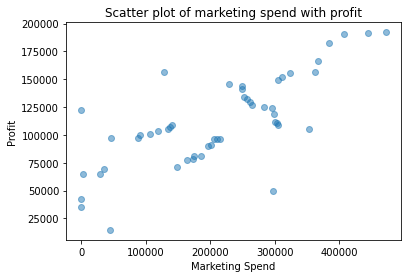

In [22]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'],alpha=0.5)
plt.title("Scatter plot of marketing spend with profit")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

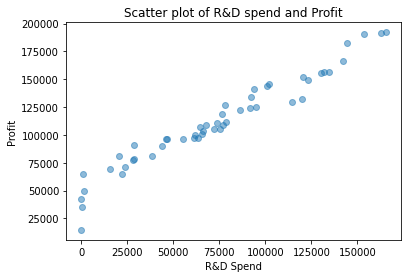

In [24]:
plt.scatter(dataset["R&D Spend"],dataset["Profit"],alpha=0.5)
plt.title("Scatter plot of R&D spend and Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

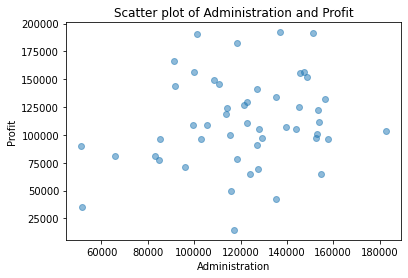

In [25]:
plt.scatter(dataset["Administration"],dataset["Profit"],alpha=0.5)
plt.title("Scatter plot of Administration and Profit")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

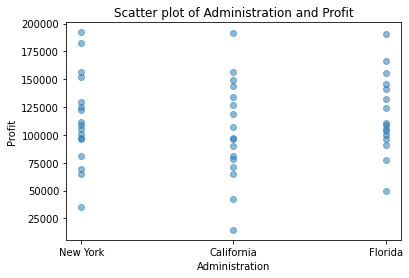

In [26]:
plt.scatter(dataset["State"],dataset["Profit"],alpha=0.5)
plt.title("Scatter plot of State and Profit")
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

In [28]:
dataset.State.nunique()

3

In [29]:
dataset.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [30]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [33]:
x=dataset.groupby("State")
x.first()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,162597.70,151377.59,443898.53,191792.06
Florida,153441.51,101145.55,407934.54,191050.39
New York,165349.20,136897.80,471784.10,192261.83


In [35]:
x.get_group("California")

,R&D Spend,Administration,Marketing Spend,Profit
1,162597.70,151377.59,443898.53,191792.06
6,134615.46,147198.87,127716.82,156122.51
9,123334.88,108679.17,304981.62,149759.96
11,100671.96,91790.61,249744.55,144259.40
13,91992.39,135495.07,252664.93,134307.35
16,78013.11,121597.55,264346.06,126992.93
20,76253.86,113867.30,298664.47,118474.03
25,64664.71,139553.16,137962.62,107404.34
32,63408.86,129219.61,46085.25,97427.84
34,46426.07,157693.92,210797.67,96712.80


In [ ]:
y=dataset.groupby(["State","Profit"])
y.first()

In [45]:
z=dataset.groupby(["State"])["Profit"]
z.first()

State
California    191792.06
Florida       191050.39
New York      192261.83
Name: Profit, dtype: float64

Text(0, 0.5, 'Profit')

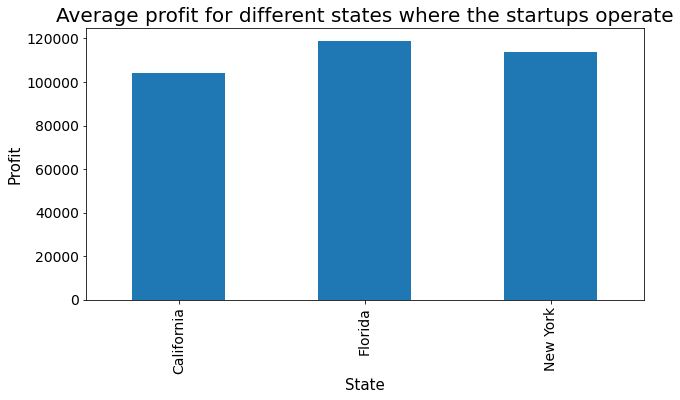

In [48]:
#Create thne figure object
ax = dataset.groupby(["State"])["Profit"].mean().plot.bar(figsize=(10,5),fontsize=14)

#set the title

ax.set_title("Average profit for different states where the startups operate", fontsize= 20)

#Set x and y-labels
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("Profit", fontsize=15)
